In [1]:
import os
import numpy as np
import pandas as pd

from tensorflow import keras

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5024332118040708358,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 10692640128
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12438614412015732986
 physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"]

```
model = ...
model = keras.utils.multi_gpu_model(model, gpus=4)
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.RMSprop(lr=1e-4), metrics=['acc'])
...
```

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255
train_scaled, val_scaled, train_target, val_target = train_test_split(\
    train_scaled, train_target, random_state = 42, test_size = 0.2)

# 손실곡선

In [5]:
def model_fn(a_layer = None):
    model = keras.Sequential()
    
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    
    if a_layer:
        model.add(a_layer)
        
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [6]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [8]:
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 0)

In [9]:
from pprint import pprint

In [10]:
# 에포크마다 손실값을 계산 
# metrics 매개변수에 accuracy 를 추가해서 history 에 추가됨
pprint(history.history)

{'accuracy': [0.8151041865348816,
              0.8596041798591614,
              0.8730208277702332,
              0.879895806312561,
              0.8882708549499512],
 'loss': [0.5287068486213684,
          0.3918899595737457,
          0.35204702615737915,
          0.3324173092842102,
          0.3158579170703888]}


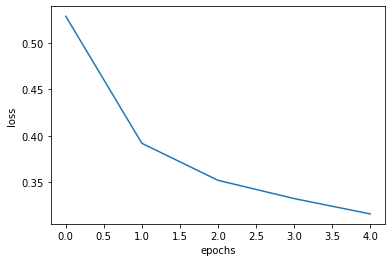

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

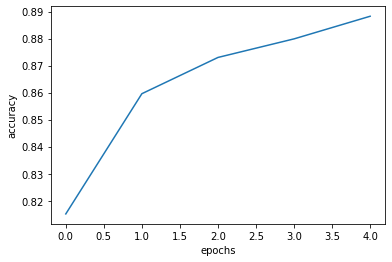

In [12]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

### epochs > 20 

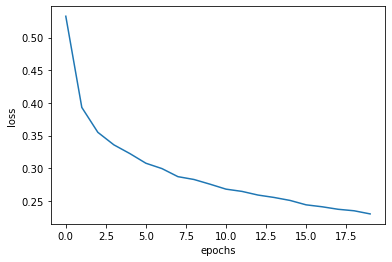

In [13]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

# 검증 손실

In [14]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,\
                   validation_data =(val_scaled, val_target))

In [15]:
pprint(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


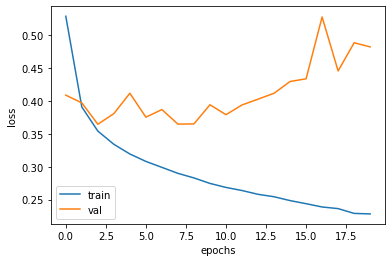

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [17]:
model = model_fn()
# model.compile(loss = 'sparse_categorical_crossentropy', metrics='accuracy')
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,\
                   validation_data =(val_scaled, val_target))

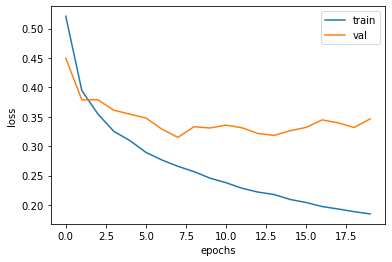

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# DropOut
과대적합 방지 > 일부 뉴런이 랜덤하게 꺼지면, 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야 한다.   
일부 뉴런의 출력이 없을 수 있다는 것을 감안하면 안정적 예측이 가능하다.


In [19]:
# 훈련 후 평가나 예측에는 적용하지 말아야 함
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

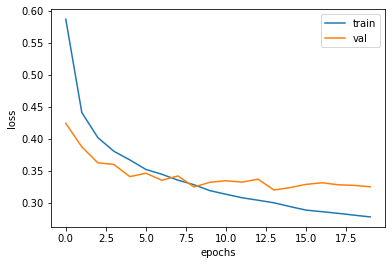

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 모델 저장과 복원

In [22]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

In [23]:
pprint(history.history)

{'accuracy': [0.7938958406448364,
              0.8425208330154419,
              0.8539999723434448,
              0.8612083196640015,
              0.8665208220481873,
              0.8698958158493042,
              0.8737499713897705,
              0.8777291774749756,
              0.8811874985694885,
              0.8807291388511658],
 'loss': [0.5829331874847412,
          0.4360652565956116,
          0.40241289138793945,
          0.3817656338214874,
          0.36289334297180176,
          0.35105252265930176,
          0.3418228030204773,
          0.33136117458343506,
          0.32652702927589417,
          0.317600280046463],
 'val_accuracy': [0.8508333563804626,
                  0.84375,
                  0.8607500195503235,
                  0.8638333082199097,
                  0.8725000023841858,
                  0.8742499947547913,
                  0.8768333196640015,
                  0.8790833353996277,
                  0.8759999871253967,
                  0.879

In [24]:
# 훈련 모델 파라미터 저장
model.save_weights('model_weights.h5')

In [25]:
# 모델 구조와 파라미터 함께 저장
model.save('model-whole.h5')

In [26]:
!ls -al *.h5

-rw-rw-r-- 1 eunbinpark eunbinpark 332480  3월 10 23:48 model_weights.h5
-rw-rw-r-- 1 eunbinpark eunbinpark 981776  3월 10 23:48 model-whole.h5


## 1. 미훈련 신규 모델 + 저장된 파라미터 파일

In [27]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model_weights.h5')
# load_weights는 save_weights 메서드로 저장했던 모델과 정확히 같은 구조여야만 한다

In [28]:
val_labels = np.argmax(model.predict(val_scaled), axis=-1)

In [29]:
np.unique(val_labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1228, 1197, 1122, 1229, 1330, 1267, 1131, 1183, 1184, 1129]))

In [30]:
np.mean(val_labels == val_target)

0.88

## 2. 모델 전체 파일

In [33]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 484us/step - loss: 0.3276 - accuracy: 0.8800


[0.32755789160728455, 0.8799999952316284]

# CallBack
훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체

In [34]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.h5')
# > 콜백이 가장 낮은 검증 점수의 모델 자동 저장 > 에포크 20번을 다 돌기 전에 조기 종료가 필요하다!! 
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target),
         callbacks=[checkpoint_cb])

In [35]:
model = keras.models.load_model('best_model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 487us/step - loss: 0.3309 - accuracy: 0.8827


[0.3309326469898224, 0.8827499747276306]

### Early Stopping

In [37]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.h5')

# patience : 검증 점수가 향상되지 않더라도 참을 에포크 횟수
# restore_best_weights : 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌린다.
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target),
            callbacks=[checkpoint_cb, early_stopping_cb])

In [40]:
early_stopping_cb.stopped_epoch

7

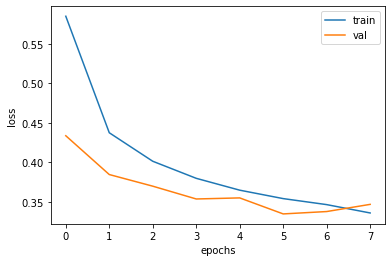

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [41]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 508us/step - loss: 0.3345 - accuracy: 0.8777


[0.33449050784111023, 0.8777499794960022]